<a href="https://colab.research.google.com/github/joao-montanari/banco-de-sangue/blob/main/banco_de_sangue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Banco de Sangue**
---



# 1. Importação das bibliotecas

Importação das bibliotecas necessárias para o projeto

- **NumPy (Numerical Python):** Serve para manipulação de arrays (vetores, matrizes, etc.) e para operações matemáticas avançadas (como estatística, álgebra linear, transformadas, etc.).
- **Matplotlib (Pyplot):** Biblioteca para visualização de dados com gráficos 2D (linhas, barras, dispersão, histogramas, etc.).
- **Pandas:** Serve para manipulação e análise de dados tabulares (como planilhas, bases CSV, SQL, etc.).
- **mpl_toolkits.mplot3d (Axes3D):** Extensão do Matplotlib para gerar gráficos tridimensionais (3D).
- **Seaborn:** Biblioteca baseada no Matplotlib para criar gráficos estatísticos mais bonitos e informativos, com menos código.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import geopandas as gpd

# 2. Importação dos dados

Por meio da biblioteca **Pandas** vazemos a leitura dos dados que existem dentro do excel "banco_de_sangue_data.xlsx" e transformamos eles em DataFrame.

In [27]:
# Transforma todos os dados do excel em um único DataFrame
df_banco_de_sangue = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name=None)

# Cria um DataFrame para cada tabela que existe dentro do excel
df_enderecos = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='enderecos')
df_horarios = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='horarios')
df_estoque = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='estoque')
df_hemocentros = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='hemocentros')
df_pessoas = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='pessoas')

# Exibe as primeiras linhas de cada DataFrame
for nome_aba, df in df_banco_de_sangue.items():
    print(f"ABA: {nome_aba} - TAMANHO: {df.shape[0]}")
    display(df.head())  # mostra as 5 primeiras linhas de cada aba
    print('\n')
    print('-='*60)
    print('\n')

ABA: enderecos - TAMANHO: 100


,ID,NUMERO,BAIRRO,RUA,CIDADE,ESTADO,PAIS,CEP,LATITUDE,LONGITUDE
0,0,812,Funcionários,Ladeira Ana Júlia Rezende,da Rocha,ES,Brasil,64352-805,-24.478985,-41.286377
1,1,33,Tupi A,Residencial Gomes,Lopes de da Luz,RJ,Brasil,65360-058,-18.739775,-44.577265
2,2,33,Vila Nova Cachoeirinha 2ª Seção,Área Murilo Viana,da Conceição,ES,Brasil,16639-670,-23.109315,-48.473523
3,3,288,Inconfidência,Parque de Lima,da Mota de Novaes,MG,Brasil,09162-202,-21.168702,-50.819875
4,4,740,Pindura Saia,Aeroporto de Rodrigues,Ferreira,RJ,Brasil,95167-329,-18.490795,-48.718617




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: horarios - TAMANHO: 100


,ID,SEG,TER,QUA,QUI,SEX,SAB,DOM
0,0,11:00-19:00,fechado,06:00-16:00,12:00-20:00,07:00-22:00,09:00-15:00,fechado
1,1,08:00-13:00,fechado,07:00-17:00,11:00-17:00,fechado,12:00-17:00,10:00-16:00
2,2,09:00-16:00,fechado,07:00-19:00,fechado,09:00-20:00,12:00-21:00,fechado
3,3,09:00-14:00,10:00-15:00,fechado,11:00-22:00,06:00-19:00,12:00-14:00,09:00-20:00
4,4,09:00-20:00,fechado,07:00-21:00,11:00-14:00,09:00-16:00,07:00-17:00,11:00-21:00




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: estoque - TAMANHO: 100


,ID,A+,A-,B+,B-,AB+,AB+2,O+,O-
0,0,155,147,310,394,143,368,269,397
1,1,341,221,303,261,120,339,240,98
2,2,220,162,363,71,149,340,344,287
3,3,361,203,262,112,311,388,395,118
4,4,283,370,141,121,52,165,328,229




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: hemocentros - TAMANHO: 100


,ID,NOME,ENDERECO_ID,MEDICOS,CAPACIDADE_MAX,HORARIO_ID,ESTOQUE_ID
0,0,Hemocentro Vida Nova,0,18,60,0,0
1,1,Banco de Sangue Esperança,1,19,74,1,1
2,2,Hemocentro Solidário,2,21,57,2,2
3,3,Centro de Hemoterapia Salvar Vidas,3,26,32,3,3
4,4,Hemocentro Santa Clara,4,14,60,4,4




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: pessoas - TAMANHO: 1000


,ID,NOME,NASCIMENTO,TIPO_SANG,PESO,ALTURA,HEMOCENTRO_ID
0,0,Maria Silva,1985-04-27 00:00:00,B+,112,1.77,15
1,1,João Santos,1993-12-19 00:00:00,O-,92,2.09,60
2,2,Ana Oliveira,1977-08-05 00:00:00,O+,74,2.04,83
3,3,Pedro Souza,2001-03-14 00:00:00,O+,77,1.72,26
4,4,Sofia Pereira,1989-11-02 00:00:00,O+,66,1.88,58




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




# 3. Visualização dos Hemocentros no Brasil

Por meio do gráfico do Brasil conseguimos ver que todos os hemocentros cadastrados em nossa base de dados estão localizados na região sudeste do país.

Essa informação foi puxada da tabela de endereços que é referenciada detro da tabela de hemocentros por meio da coluna *endereco_id*.

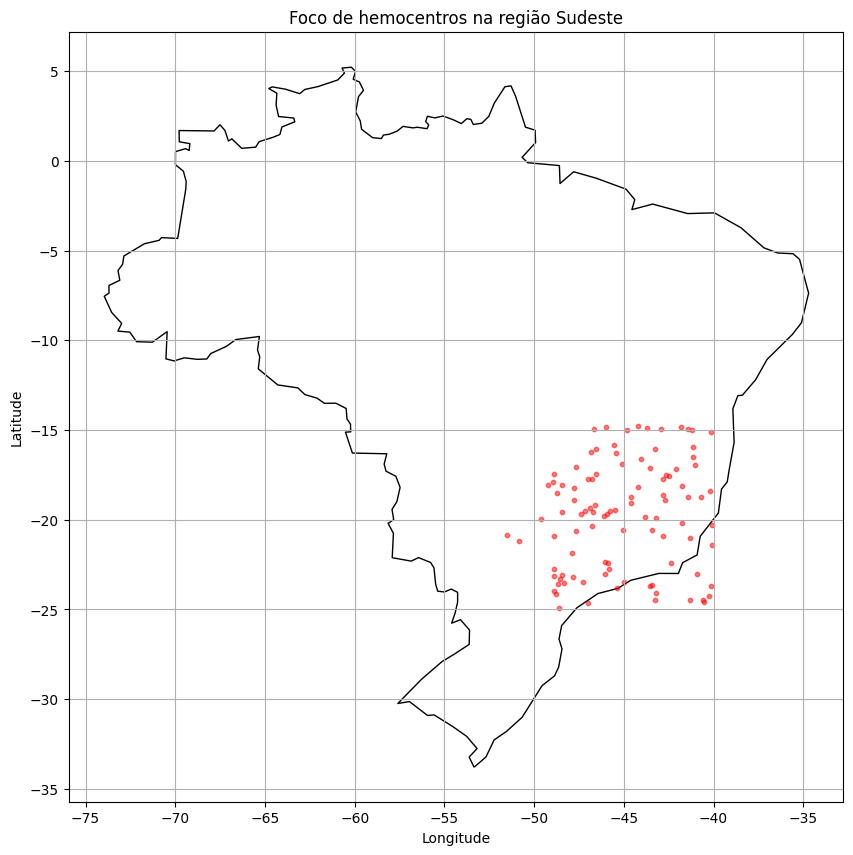

In [28]:
gdf = gpd.GeoDataFrame(df_enderecos, geometry=gpd.points_from_xy(df_enderecos['LONGITUDE'], df_enderecos['LATITUDE'])) # Transformando o DataFrame comum em GeoDataFrame
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

brasil = gpd.read_file(url).query('SOVEREIGNT=="Brazil"') # Carrega o mapa básico do Brasil

fig, ax = plt.subplots(figsize=(10,10))
brasil.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)

plt.title("Foco de hemocentros na região Sudeste")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()